In [6]:
from IPython.core.display import display, HTML # for some notebook formatting.

import mlrose_hiive
import numpy as np
import logging
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd


from ast import literal_eval
import chess

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from mlrose_hiive import QueensGenerator, MaxKColorGenerator, TSPGenerator
from mlrose_hiive import SARunner, GARunner, MIMICRunner, RHCRunner

from util.utils import run_experiment_multi_seed, runner_results_to_stats, plot_fitness_iteration, get_optimal_hyperparameters
from util.utils import plot_fitness_vs_hyperparameter, plot_HP_heatmap

# switch off the chatter
logging.basicConfig(level=logging.WARNING)

import time


%load_ext autoreload
%autoreload 2

# Fixed random seed for reproducibility on random optimization problems
FIXED_SEED = 42
np.random.seed(FIXED_SEED)
# Random Seeds for reproducibility
RANDOM_SEEDS = [1, 2, 3, 4, 5]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1. Initialization of the problems
There will be three subproblems per RO problem with increasing difficulty. For TSP, difficulty is increasing as the number of cities increases.<br>
We define the subproblems as follows:
1. **Easy**: &emsp;&emsp;&ensp; $n_{cities} = 10$
2. **Medium**:&emsp; $n_{cities} = 25$
3. **Hard**: &emsp;&emsp;&ensp;$n_{cities} = 50$

Each problem will be solved using the following algorithms:
1. **Hill Climbing with Random Restarts (RHC)**
2. **Simulated Annealing (SA)**
3. **Genetic Algorithm (GA)**
4. **MIMIC**

For each algorithm, we will run the random optimization algorithm with a set of random seeds to mitigate the effect of lucky and unlucky runs.

In [4]:
# Initialization of the TSP problems
problem_easy = TSPGenerator().generate(seed=FIXED_SEED, number_of_cities=10, maximize=True)
problem_medium = TSPGenerator().generate(seed=FIXED_SEED, number_of_cities=20, maximize=True)
problem_hard = TSPGenerator().generate(seed=FIXED_SEED, number_of_cities=30, maximize=True)

# 2. Random Optimization of Traveling Salesman Problem
The Traveling Salesman Problem (TSP) is a classic optimization problem where the goal is to find the shortest tour of a set of cities. The TSP is NP-hard, meaning that there is no known polynomial-time solution for it. We will solve the TSP using the Randomized Optimization Algorithms (ROAs) mentioned above.For stability and reproducibility, we will use a fixed set of random seeds for each problem and algorithm<br><br>

We expect that the best algorithm for TSP will be GA or MIMIC, as they are designed to solve combinatorial optimization problems. However, we will also test the other algorithms to see how they perform on this problem.

## 2.1 RHC
The Randomized Hill Climbing (RHC) algorithm is a simple optimization algorithm that works by iteratively moving from the current solution to a neighboring solution. The algorithm is called "randomized" because it chooses a random neighbor at each iteration. The algorithm is also called "hill climbing" because it always moves to the neighbor that improves the objective function value. The algorithm is simple and easy to implement, but it is not guaranteed to find the global optimum, especially for non-convex problems like the TSP.

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.32it/s]


<Figure size 640x480 with 0 Axes>

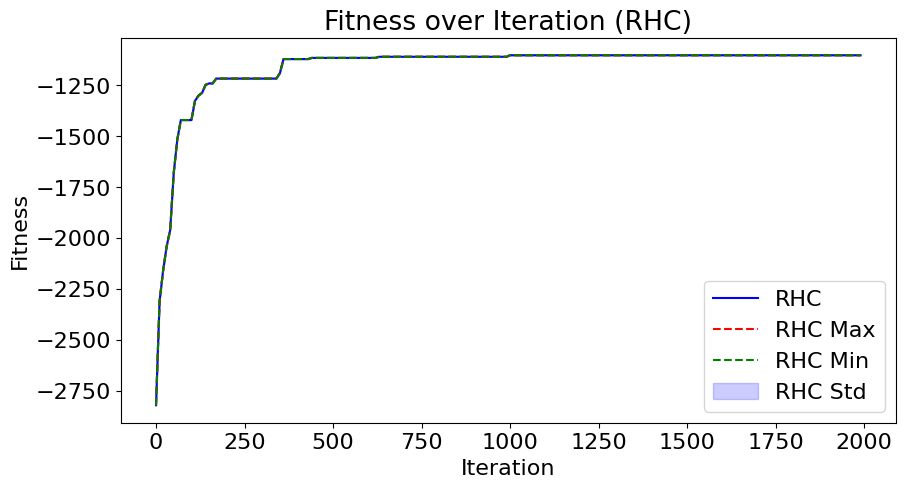

Best Fitness: -1103.1068921425106


In [5]:
rhc = RHCRunner(
                problem=problem_medium,
                experiment_name='rhc',
                output_directory=None,
                seed=FIXED_SEED,
                iteration_list= np.arange(0, 2000, 10),
                restart_list=[0],
                max_attempts=10000,
                )

# rhc_results = run_experiment_multi_seed(rhc, RANDOM_SEEDS)
rhc_results = rhc.run()
rhc_results = [rhc_results]
rhc_mean, rhc_std, rhc_min, rhc_max = runner_results_to_stats(rhc_results)
# plot the mean and std of the fitness with nice plots
plot_fitness_iteration(rhc_mean, rhc_std, rhc_min, rhc_max, "RHC", "TSP", x_axis="Iteration")
print(f'Best Fitness: {rhc_mean["Fitness"].max()}')

In [20]:
rhc = RHCRunner(
                problem=problem_medium,
                experiment_name='rhc',
                output_directory=None,
                seed=FIXED_SEED,
                iteration_list= np.arange(0, 2000, 10),
                restart_list=[10],
                max_attempts=300,
                )

# rhc_results = run_experiment_multi_seed(rhc, RANDOM_SEEDS)
start = time.time()
rhc_results = rhc.run()
end = time.time()
# print the time it took to run the experiment in seconds
print(end - start)

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:23<00:00, 23.60s/it]

23.630480527877808


In [21]:
rhc_results = [rhc_results]
rhc_mean, rhc_std, rhc_min, rhc_max = runner_results_to_stats(rhc_results)

<Figure size 640x480 with 0 Axes>

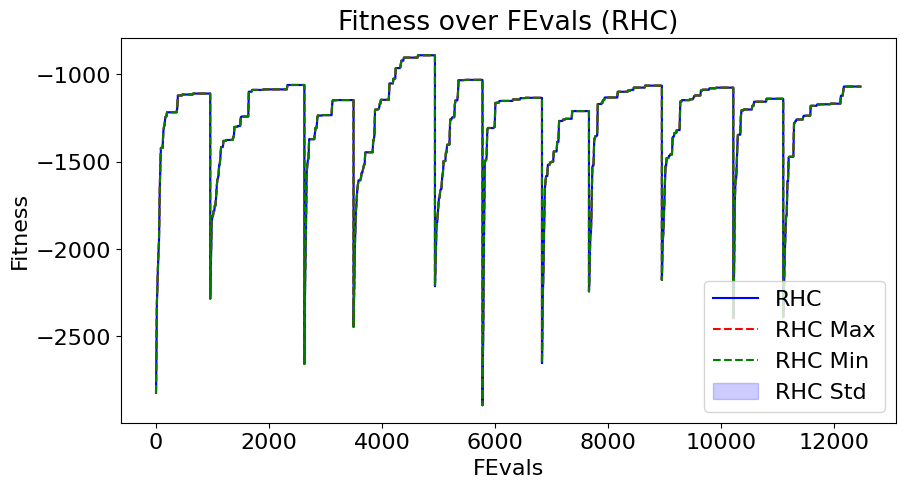

Best Fitness: -891.6357611215572


In [22]:
# plot the mean and std of the fitness with nice plots
plot_fitness_iteration(rhc_mean, rhc_std, rhc_min, rhc_max, "RHC", "TSP", x_axis="FEvals")
print(f'Best Fitness: {rhc_mean["Fitness"].max()}')

In [23]:
rhc_mean

,Iteration,Fitness,FEvals,Time,State,Restarts,max_iters,current_restart
0,0,-2821.973802,0.0,0.000207,"[0, 17, 15, 1, 8, 5, 11, 3, 18, 16, 13, 2, 9, ...",10,1990,0
1,10,-2311.474034,15.0,0.001907,"[14, 17, 5, 1, 8, 15, 11, 13, 18, 16, 19, 2, 9...",10,1990,0
2,20,-2161.330998,28.0,0.003668,"[14, 17, 5, 4, 8, 15, 11, 18, 13, 16, 19, 2, 9...",10,1990,0
3,30,-2041.923433,40.0,0.005200,"[14, 17, 1, 3, 8, 15, 11, 18, 13, 16, 19, 2, 9...",10,1990,0
4,40,-1960.899114,52.0,0.006374,"[14, 17, 7, 3, 8, 15, 11, 18, 13, 16, 19, 2, 1...",10,1990,0
...,...,...,...,...,...,...,...,...
2195,1950,-1070.504009,12475.0,23.582986,"[11, 18, 9, 8, 4, 15, 12, 5, 7, 3, 6, 10, 13, ...",10,1990,10
2196,1960,-1070.504009,12475.0,23.582986,"[11, 18, 9, 8, 4, 15, 12, 5, 7, 3, 6, 10, 13, ...",10,1990,10
2197,1970,-1070.504009,12475.0,23.582986,"[11, 18, 9, 8, 4, 15, 12, 5, 7, 3, 6, 10, 13, ...",10,1990,10
2198,1980,-1070.504009,12475.0,23.582986,"[11, 18, 9, 8, 4, 15, 12, 5, 7, 3, 6, 10, 13, ...",10,1990,10


In [28]:
rhc = RHCRunner(
                problem=problem_hard,
                experiment_name='rhc',
                output_directory=None,
                seed=FIXED_SEED,
                iteration_list= np.arange(0, 2000, 10),
                restart_list=[10],
                max_attempts=300,
                )

# rhc_results = run_experiment_multi_seed(rhc, RANDOM_SEEDS)
start = time.time()
rhc_results = rhc.run()
end = time.time()
# print the time it took to run the experiment in seconds
print(end - start)

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [01:01<00:00, 61.04s/it]

61.071898221969604


In [29]:
rhc_results = [rhc_results]
rhc_mean, rhc_std, rhc_min, rhc_max = runner_results_to_stats(rhc_results)

<Figure size 640x480 with 0 Axes>

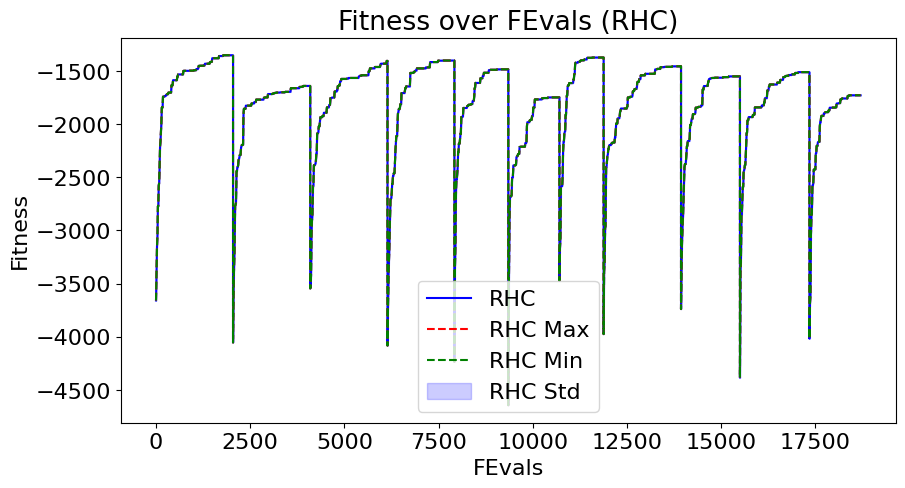

Best Fitness: -1352.6565499086605
Number of FEvals: 18698.0


In [30]:
# plot the mean and std of the fitness with nice plots
plot_fitness_iteration(rhc_mean, rhc_std, rhc_min, rhc_max, "RHC", "TSP", x_axis="FEvals")
print(f'Best Fitness: {rhc_mean["Fitness"].max()}')
print(f'Number of FEvals: {rhc_mean["FEvals"].max()}')

<Figure size 640x480 with 0 Axes>

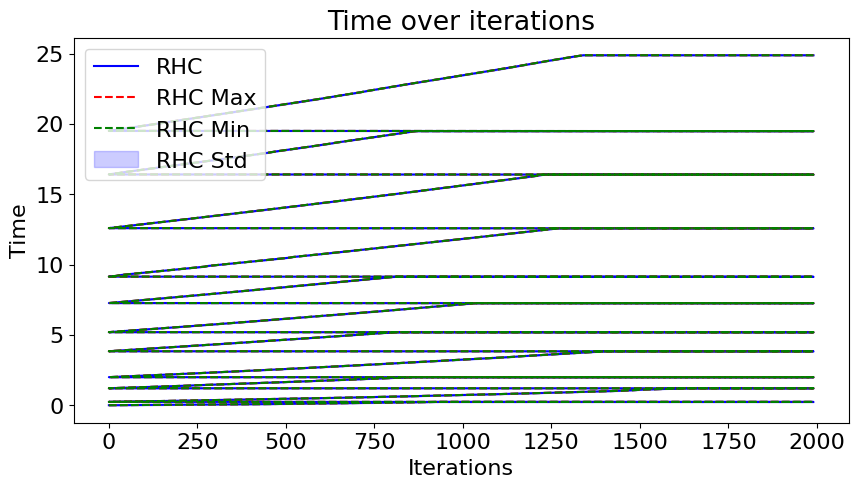

In [35]:
# plot the mean and std of the time with nice plots

plt.figure()
# Fig size
plt.figure(figsize=(10, 5))
# Font size
plt.rc('font', size=16)
plt.plot(rhc_mean['Iteration'], rhc_mean['Time'], label='RHC', color='b')
plt.plot(rhc_max['Iteration'], rhc_max['Time'], label='RHC Max', color='r', linestyle='--')
plt.plot(rhc_min['Iteration'], rhc_min['Time'], label='RHC Min', color='g', linestyle='--')
plt.fill_between(rhc_mean['Iteration'], rhc_mean['Time'] - rhc_std['Time'], rhc_mean['Time'] + rhc_std['Time'], color='b', alpha=0.2, label='RHC Std')
plt.xlabel('Iterations')
plt.ylabel('Time')
plt.title('Time over iterations')
plt.legend()
plt.show()


<Figure size 640x480 with 0 Axes>

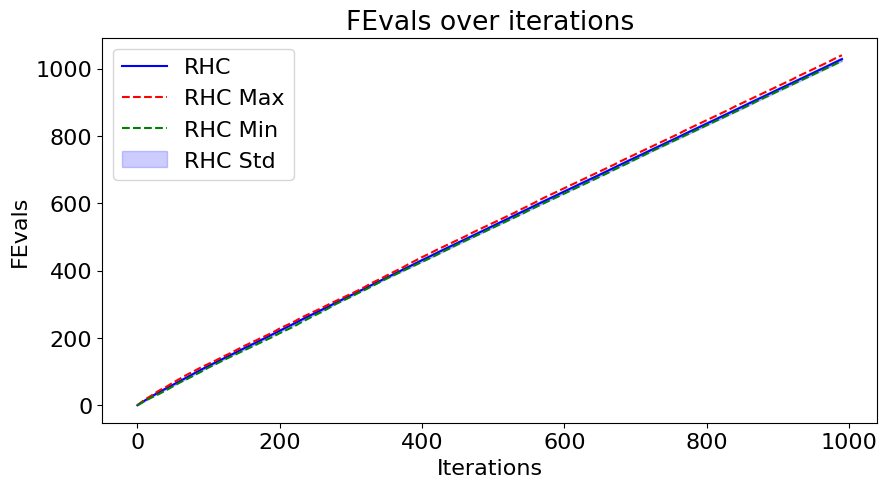

In [7]:
# plot the mean and std of the fevals with nice plots

plt.figure()
# Fig size
plt.figure(figsize=(10, 5))
# Font size
plt.rc('font', size=16)
plt.plot(rhc_mean['Iteration'], rhc_mean['FEvals'], label='RHC', color='b')
plt.plot(rhc_max['Iteration'], rhc_max['FEvals'], label='RHC Max', color='r', linestyle='--')
plt.plot(rhc_min['Iteration'], rhc_min['FEvals'], label='RHC Min', color='g', linestyle='--')
plt.fill_between(rhc_mean['Iteration'], rhc_mean['FEvals'] - rhc_std['FEvals'], rhc_mean['FEvals'] + rhc_std['FEvals'], color='b', alpha=0.2, label='RHC Std')
plt.xlabel('Iterations')
plt.ylabel('FEvals')
plt.title('FEvals over iterations')
plt.legend()
plt.show()

### 2.1.1 Problem difficulty analysis

In [11]:
rhc_easy = RHCRunner(
                problem=problem_easy,
                experiment_name='rhc',
                output_directory=None,
                seed=FIXED_SEED,
                iteration_list= np.arange(0, 300, 10),
                restart_list=[0],
                max_attempts=300,
                )

rhc_results_easy = run_experiment_multi_seed(rhc_easy, RANDOM_SEEDS)

rhc_medium = RHCRunner(
                problem=problem_medium,
                experiment_name='rhc',
                output_directory=None,
                seed=FIXED_SEED,
                iteration_list= np.arange(0, 500, 10),
                restart_list=[0],
                max_attempts=500,
                )

rhc_results_medium = run_experiment_multi_seed(rhc_medium, RANDOM_SEEDS)

rhc_hard = RHCRunner(
                problem=problem_hard,
                experiment_name='rhc',
                output_directory=None,
                seed=FIXED_SEED,
                iteration_list= np.arange(0, 2500, 10),
                restart_list=[0],
                max_attempts=1000,
                )

rhc_results_hard = run_experiment_multi_seed(rhc_hard, RANDOM_SEEDS)

In [12]:
rhc_mean_easy, rhc_std_easy, rhc_min_easy, rhc_max_easy = runner_results_to_stats(rhc_results_easy)
rhc_mean_medium, rhc_std_medium, rhc_min_medium, rhc_max_medium = runner_results_to_stats(rhc_results_medium)
rhc_mean_hard, rhc_std_hard, rhc_min_hard, rhc_max_hard = runner_results_to_stats(rhc_results_hard)

<Figure size 640x480 with 0 Axes>

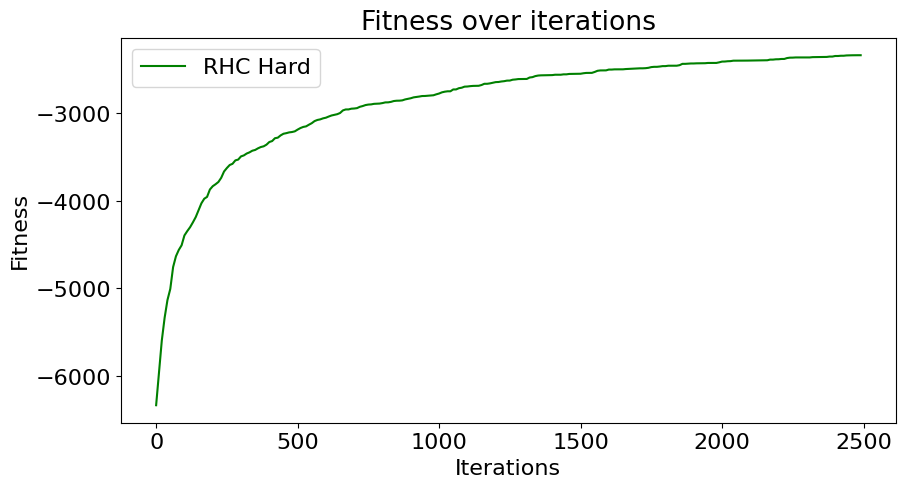

In [13]:
# Plot the mean fitness for all problems
plt.figure()
# Fig size
plt.figure(figsize=(10, 5))
# Font size
plt.rc('font', size=16)
# plt.plot(rhc_mean_easy['Iteration'], rhc_mean_easy['Fitness'], label='RHC Easy', color='b')
# plt.plot(rhc_mean_medium['Iteration'], rhc_mean_medium['Fitness'], label='RHC Medium', color='r')
plt.plot(rhc_mean_hard['Iteration'], rhc_mean_hard['Fitness'], label='RHC Hard', color='g')
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.title('Fitness over iterations')
plt.legend()
plt.show()

In [14]:
# get last row of rch_mean_hard
best_it = rhc_mean_hard.iloc[-1]
best_state = best_it['State']

# get the best state from the run
ordered_state = literal_eval(best_state)

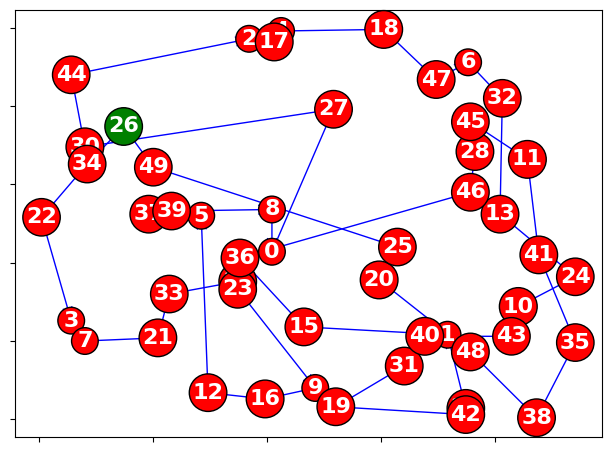

In [15]:
fig, ax = plt.subplots(1)         # Prepare 2 plots
ax.set_yticklabels([])
ax.set_xticklabels([])
for i, (x,y) in enumerate(problem_hard.coords):
    ax.scatter(x,y, s=1,c='green' if i == 5 else 'cornflowerblue')             # plot A


for i in range(len(ordered_state)):
    start_node = ordered_state[i]
    end_node = ordered_state[(i+1) % len(ordered_state)]
    start_pos = problem_hard.coords[start_node]
    end_pos = problem_hard.coords[end_node]
    ax.annotate("",
            xy=start_pos, xycoords='data',
            xytext=end_pos, textcoords='data',
            c='red',
            arrowprops=dict(arrowstyle="->",
                            ec='blue',
                            connectionstyle="arc3"))
node_labels = {k:str(k) for k in range(len(problem_hard.source_graph.nodes))}

for i in node_labels.keys():
    x,y = problem_hard.coords[i]
    plt.text(x, y, node_labels[i], ha="center", va="center", c='white', fontweight='bold',
             bbox = dict(boxstyle=f"circle,pad=0.15", fc='green' if i == ordered_state[0] else 'red'))

plt.tight_layout()
plt.show()

## 2.2 Simulated Annealing

In [17]:
sa = SARunner(problem=problem_medium,
              experiment_name='sa',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=FIXED_SEED,
              iteration_list=np.arange(0, 1000, 10),
              max_attempts=1000,
              temperature_list=[0.1],
              decay_list=[mlrose_hiive.GeomDecay])

sa_results = run_experiment_multi_seed(sa, RANDOM_SEEDS)
sa_mean, sa_std, sa_min, sa_max = runner_results_to_stats(sa_results)

<Figure size 640x480 with 0 Axes>

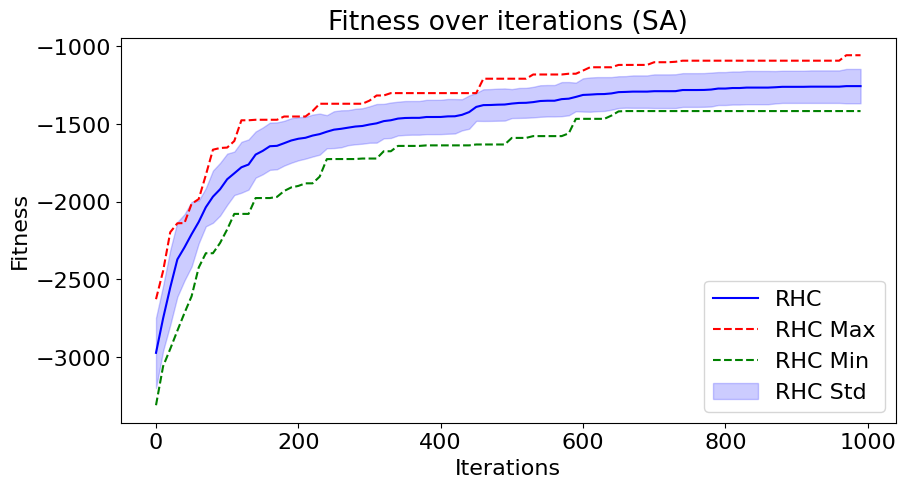

Best Fitness: -1255.9658969568889


In [14]:
plot_fitness_iteration(sa_mean, sa_std, sa_min, sa_max, "SA", "TSP")
print(f'Best Fitness: {sa_mean["Fitness"].max()}')

## 2.3 Genetic Algorithm

In [19]:
ga = GARunner(problem=problem_medium,
              experiment_name='tsp_ga',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=FIXED_SEED,
              iteration_list=np.arange(0, 1000, 10),
              max_attempts=1000,
              population_sizes=[50],
              mutation_rates=[0.05]
            )

ga_results = run_experiment_multi_seed(ga, RANDOM_SEEDS)

In [16]:
ga_mean, ga_std, ga_min, ga_max = runner_results_to_stats(ga_results)

<Figure size 640x480 with 0 Axes>

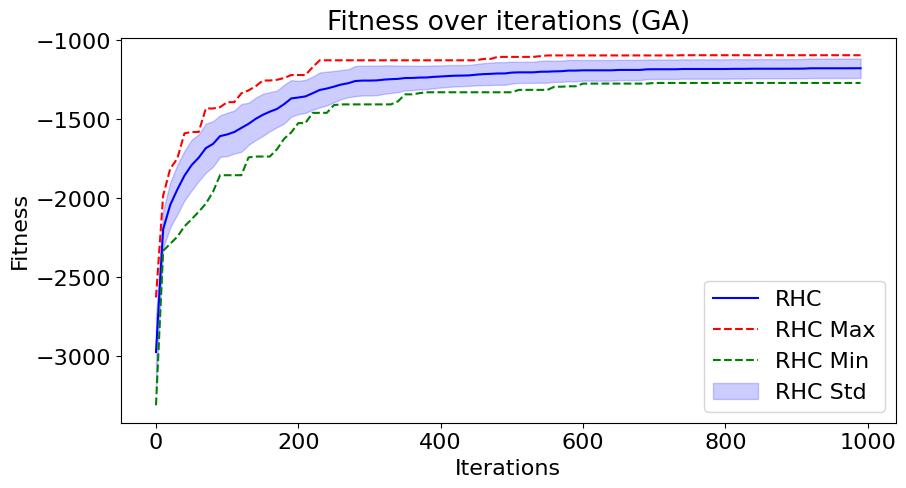

-1176.0630587357605


In [17]:
plot_fitness_iteration(ga_mean, ga_std, ga_min, ga_max, "GA", "TSP")
print(ga_mean['Fitness'].max())

## 2.4 MIMIC

In [32]:
mmc = MIMICRunner(problem=problem_medium,
                    experiment_name='tsp_mimic',
                    output_directory=None, # note: specify an output directory to have results saved to disk
                    seed=FIXED_SEED,
                    iteration_list=np.arange(0, 25, 1),
                    max_attempts=25,
                    population_sizes=[100],
                    keep_percent_list=[0.6],
                    use_fast_mimic=True
                    )

mmc_results = run_experiment_multi_seed(mmc, RANDOM_SEEDS)
mmc_mean, mmc_std, mmc_min, mmc_max = runner_results_to_stats(mmc_results)

KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

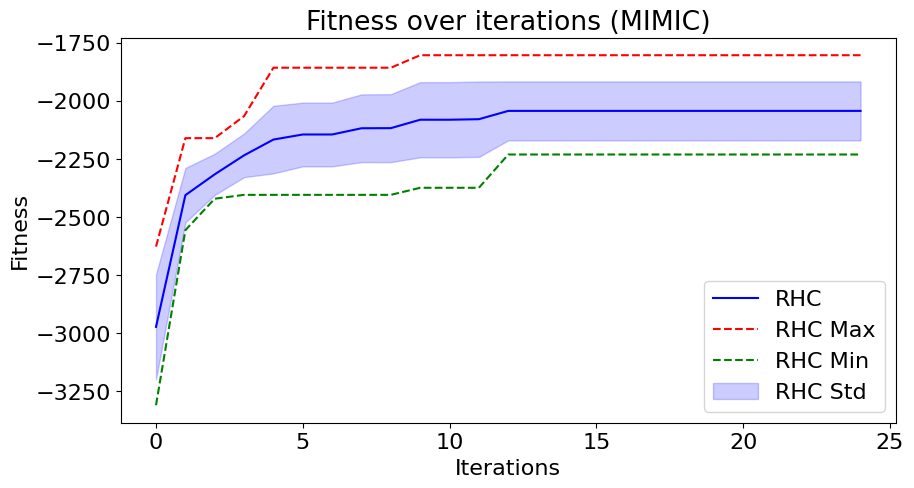

-2043.1222429112458


In [22]:
plot_fitness_iteration(mmc_mean, mmc_std, mmc_min, mmc_max, "MIMIC", "TSP")
print(mmc_mean['Fitness'].max())

# 3. Hyper-parameter tuning

## 3.1 SA

In [14]:
sa = SARunner(problem=problem_medium,
              experiment_name='sa',
              output_directory=None, # note: specify an output directory to have results saved to disk "experiments/TSP_SA_HP"
              seed=FIXED_SEED,
              iteration_list=2**np.arange(13),
              max_attempts=500,
              temperature_list=[0.5, 1.0, 2.0, 3.0, 5.0, 10.0, 20.0],
              decay_list=[mlrose_hiive.ArithDecay, mlrose_hiive.ExpDecay, mlrose_hiive.GeomDecay])

sa_results = run_experiment_multi_seed(sa, RANDOM_SEEDS)

# Save the results to experiments/TSP_SA_HP using pickle
import pickle
with open('experiments/TSP_SA_HP.pkl', 'wb') as f:
    pickle.dump(sa_results, f)

In [15]:
# Load the results from experiments/TSP_SA_HP using pickle
import pickle
with open('experiments/TSP_SA_HP.pkl', 'rb') as f:
    sa_results = pickle.load(f)
sa_hp_mean, sa_hp_std, sa_hp_min, sa_hp_max = runner_results_to_stats(sa_results)

In [16]:
best_it = get_optimal_hyperparameters(sa_hp_mean)
sa_optimal_HP = {}
sa_optimal_HP['schedule_init_temp'] = best_it['schedule_init_temp']
sa_optimal_HP['schedule_type'] = best_it['schedule_type']
sa_optimal_HP

{'schedule_init_temp': 10.0, 'schedule_type': 'arithmetic'}

schedule_type
schedule_init_temp = 0.5 Fitness: -1106.7250964346954
schedule_init_temp = 1.0 Fitness: -1123.707710871829
schedule_init_temp = 2.0 Fitness: -1074.5509516236866
schedule_init_temp = 3.0 Fitness: -1064.248663256539
schedule_init_temp = 5.0 Fitness: -1058.564858291088
schedule_init_temp = 10.0 Fitness: -981.6813023157662
schedule_init_temp = 20.0 Fitness: -1034.0951360255065


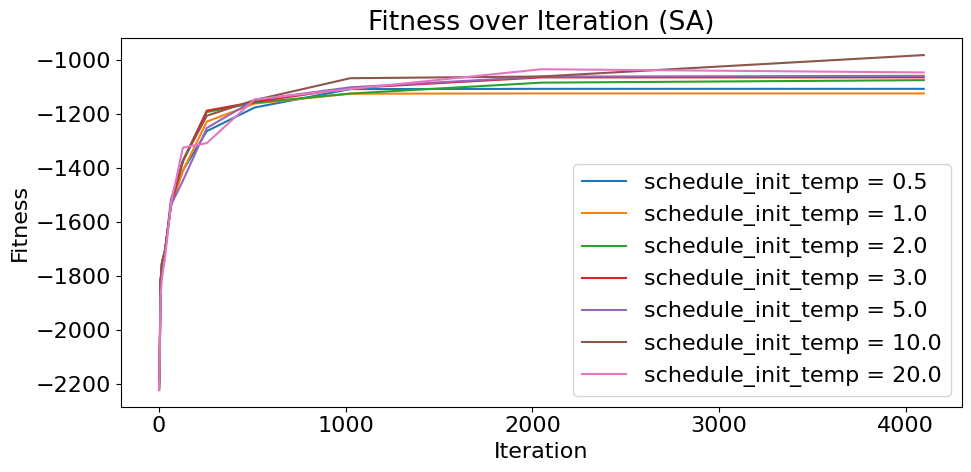

schedule_init_temp
schedule_type = arithmetic Fitness: -981.6813023157662
schedule_type = exponential Fitness: -1107.683974471572
schedule_type = geometric Fitness: -1133.5646182581615


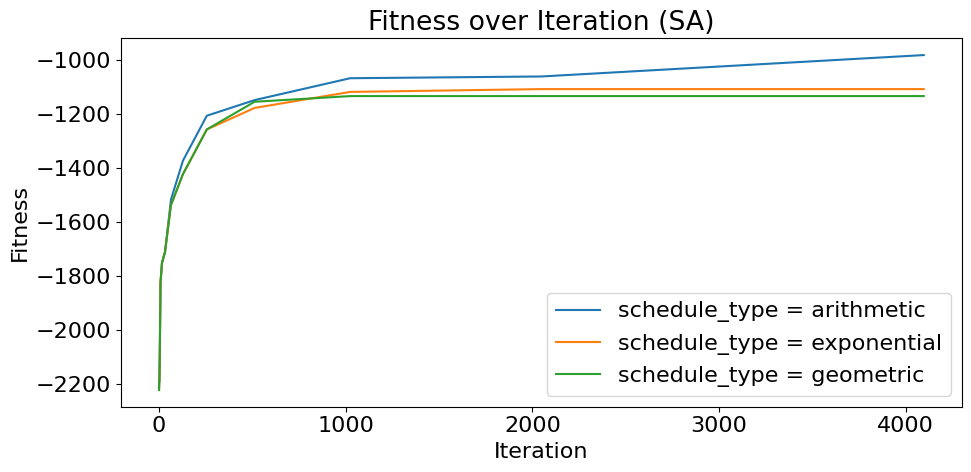

In [17]:
for key in sa_optimal_HP.keys():
    plot_fitness_vs_hyperparameter(sa_hp_mean, sa_hp_std, sa_optimal_HP, key, "SA", "TSP")

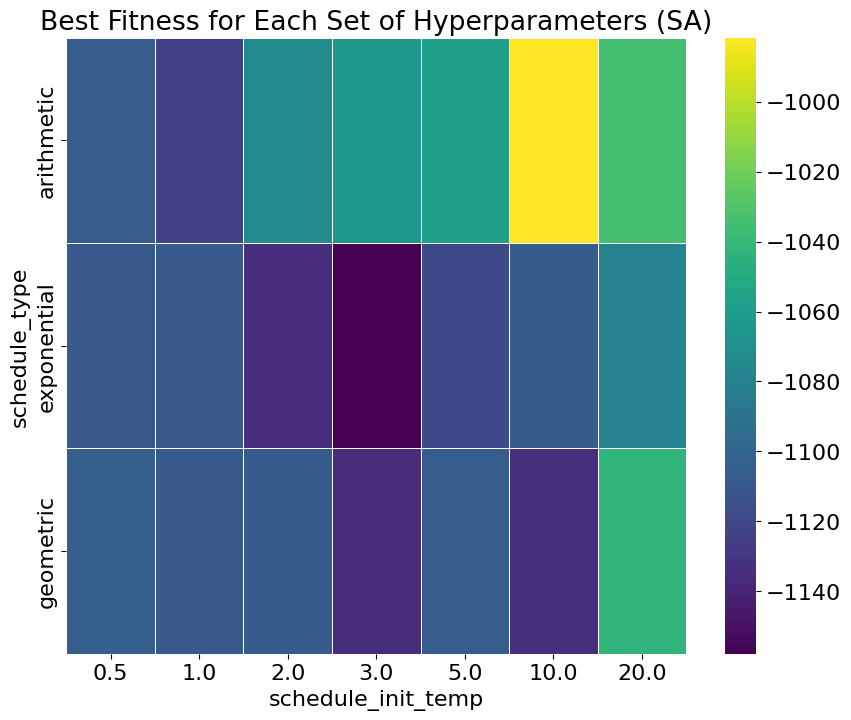

In [18]:
plot_HP_heatmap(sa_hp_mean, 'schedule_init_temp', 'schedule_type',  "SA", "TSP")

## 3.2 GA

In [3]:
ga = GARunner(problem=problem_medium,
              experiment_name='tsp_ga',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=FIXED_SEED,
              iteration_list=2 ** np.arange(12),
              max_attempts=50,
              population_sizes=np.arange(200, 700, 100),
              mutation_rates=[0.05, 0.1, 0.15, 0.2, 0.25]
            )

ga_results = run_experiment_multi_seed(ga, RANDOM_SEEDS)

import pickle
with open('experiments/TSP_GA_HP.pkl', 'wb') as f:
    pickle.dump(ga_results, f)

100%|██████████| 25/25 [09:28<00:00, 22.74s/it]


In [4]:
import pickle
with open('experiments/TSP_GA_HP.pkl', 'rb') as f:
    ga_results = pickle.load(f)

ga_hp_mean, ga_hp_std, ga_hp_min, ga_hp_max = runner_results_to_stats(ga_results)

best_it = get_optimal_hyperparameters(ga_hp_mean)
ga_optimal_HP = {}
ga_optimal_HP['Mutation Rate'] = best_it['Mutation Rate']
ga_optimal_HP['Population Size'] = best_it['Population Size']
ga_optimal_HP

{'Mutation Rate': 0.25, 'Population Size': 600}

Population Size
Mutation Rate = 0.05 Fitness: -1053.7888951444734
Mutation Rate = 0.1 Fitness: -1093.3678099114527
Mutation Rate = 0.15 Fitness: -1088.9615765640256
Mutation Rate = 0.2 Fitness: -1035.1827530193646
Mutation Rate = 0.25 Fitness: -1029.431891540729


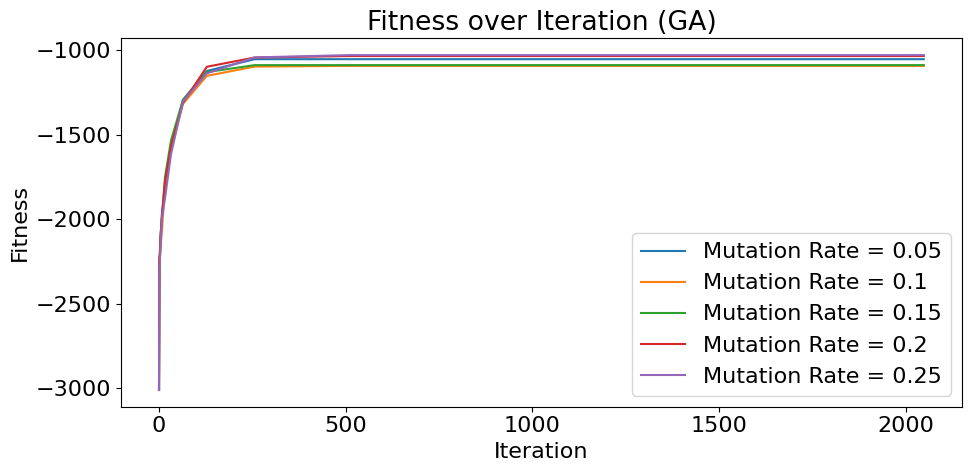

Mutation Rate
Population Size = 200 Fitness: -1161.9160646478035
Population Size = 300 Fitness: -1126.2327206342725
Population Size = 400 Fitness: -1030.0733411043602
Population Size = 500 Fitness: -1102.094936498525
Population Size = 600 Fitness: -1029.431891540729


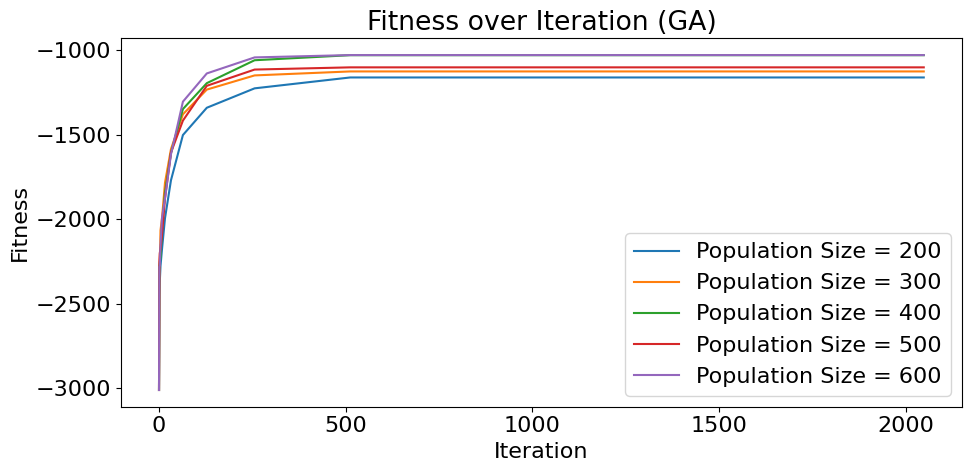

In [5]:
for key in ga_optimal_HP.keys():
    plot_fitness_vs_hyperparameter(ga_hp_mean, ga_hp_std, ga_optimal_HP, key, "GA", "TSP")

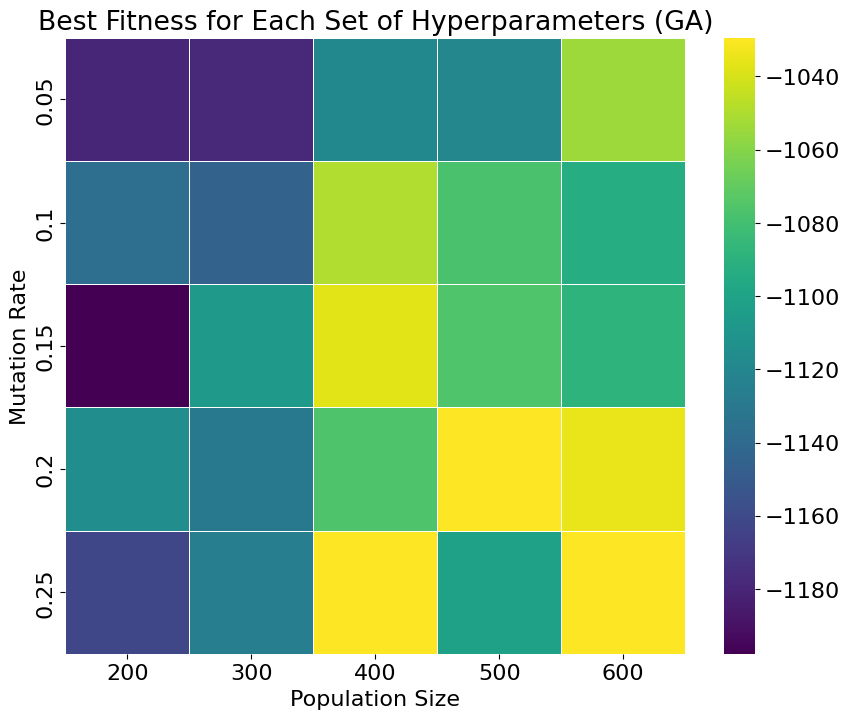

In [6]:
plot_HP_heatmap(ga_hp_mean, 'Population Size', 'Mutation Rate', 'GA', 'TSP')

## 3.3 MIMIC

In [3]:
mmc = MIMICRunner(problem=problem_medium,
                    experiment_name='tsp_mimic',
                    output_directory=None, # note: specify an output directory to have results saved to disk
                    seed=FIXED_SEED,
                    iteration_list=np.arange(0, 25, 1),
                    max_attempts=25,
                    population_sizes=np.arange(50, 500, 50),
                    keep_percent_list=[0.1, 0.3, 0.5, 0.7, 0.9],
                    use_fast_mimic=True
                    )

mmc_results = run_experiment_multi_seed(mmc, RANDOM_SEEDS)

import pickle
with open('experiments/TSP_MIMIC_HP.pkl', 'wb') as f:
    pickle.dump(mmc_results, f)

100%|██████████| 45/45 [14:14<00:00, 18.99s/it]


In [54]:
import pickle
with open('experiments/TSP_MIMIC_HP.pkl', 'rb') as f:
    mmc_results = pickle.load(f)

mmc_hp_mean, mmc_hp_std, mmc_hp_min, mmc_hp_max = runner_results_to_stats(mmc_results)

best_it = get_optimal_hyperparameters(mmc_hp_mean)
mmc_optimal_HP = {}
mmc_optimal_HP['Keep Percent'] = best_it['Keep Percent']
mmc_optimal_HP['Population Size'] = best_it['Population Size']
mmc_optimal_HP

{'Keep Percent': 0.3, 'Population Size': 400}

Population Size
Keep Percent = 0.1 Fitness: -1921.2301846325383
Keep Percent = 0.3 Fitness: -1628.4844861783358
Keep Percent = 0.5 Fitness: -1695.3685260345421
Keep Percent = 0.7 Fitness: -1854.931803421589
Keep Percent = 0.9 Fitness: -1975.5987922565098


<Figure size 640x480 with 0 Axes>

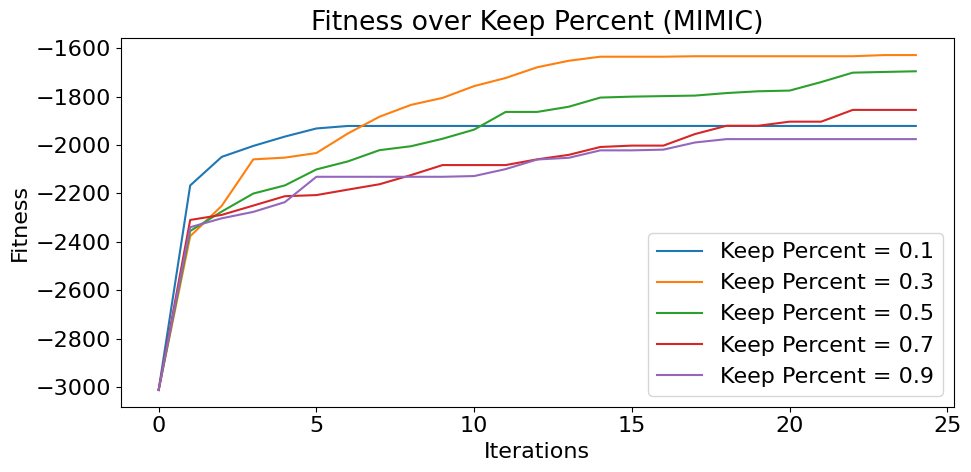

Keep Percent
Population Size = 50 Fitness: -2507.7697659440846
Population Size = 100 Fitness: -2349.830345587715
Population Size = 150 Fitness: -2138.4237569523084
Population Size = 200 Fitness: -1900.102090635973
Population Size = 250 Fitness: -1734.692664672412
Population Size = 300 Fitness: -1862.4553006756373
Population Size = 350 Fitness: -1777.1502887243491
Population Size = 400 Fitness: -1628.4844861783358
Population Size = 450 Fitness: -1675.3985650178681


<Figure size 640x480 with 0 Axes>

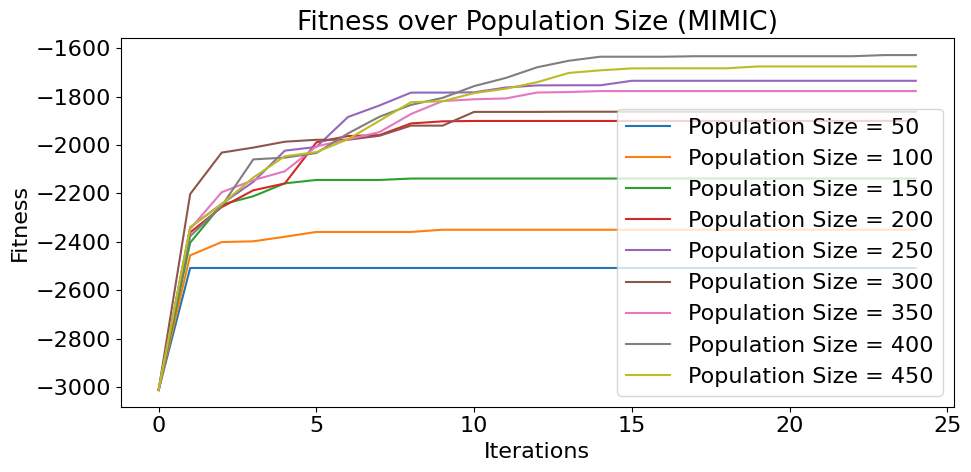

In [55]:
for key in mmc_optimal_HP.keys():
    plot_fitness_vs_hyperparameter(mmc_hp_mean, mmc_hp_std, mmc_optimal_HP, key, "MIMIC", "TSP")

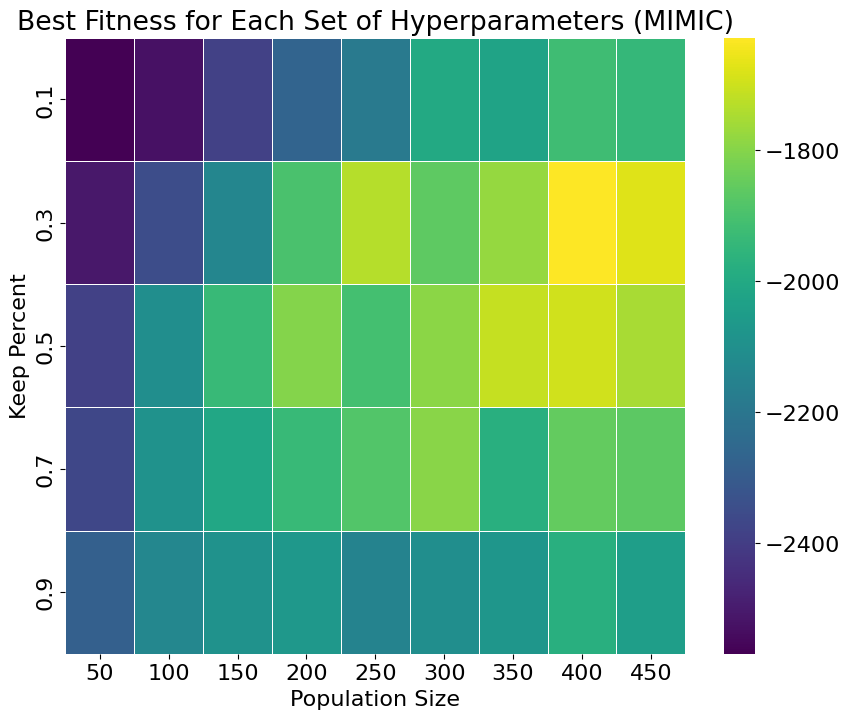

In [6]:
plot_HP_heatmap(mmc_hp_mean, 'Population Size', 'Keep Percent', 'MIMIC', 'TSP')

## 3.4 RHC
There is no hyper-parameter to tune for RHC. We will use the default parameters for RHC in our comparison.

# 4. Comparison of Algorithms

In [20]:
import pickle
# load the results from the experiments
with open('experiments/TSP_SA_HP.pkl', 'rb') as f:
    sa_results = pickle.load(f)

with open('experiments/TSP_GA_HP.pkl', 'rb') as f:
    ga_results = pickle.load(f)

with open('experiments/TSP_MIMIC_HP.pkl', 'rb') as f:
    mmc_results = pickle.load(f)

# get the mean, std, min and max from the results
sa_hp_mean, sa_hp_std, sa_hp_min, sa_hp_max = runner_results_to_stats(sa_results)
ga_hp_mean, ga_hp_std, ga_hp_min, ga_hp_max = runner_results_to_stats(ga_results)
mmc_hp_mean, mmc_hp_std, mmc_hp_min, mmc_hp_max = runner_results_to_stats(mmc_results)

In [21]:
# Make a df with the best fitness for each algorithm
best_fitness = pd.DataFrame({'RHC': [rhc_mean['Fitness'].max()],
                             'SA': [sa_hp_mean['Fitness'].max()],
                             'GA': [ga_hp_mean['Fitness'].max()],
                             'MIMIC': [mmc_hp_mean['Fitness'].max()]})
best_fitness

,RHC,SA,GA,MIMIC
0,-1244.390992,-1166.417785,-1009.607076,-1628.484486


In [23]:
# Make a df with the timing for each algorithm for the last iteration
timing = pd.DataFrame({'RHC': [rhc_mean['Time'].iloc[-1]],
                             'SA': [sa_hp_mean['Time'].iloc[-1]],
                             'GA': [ga_hp_mean['Time'].iloc[-1]],
                             'MIMIC': [mmc_hp_mean['Time'].iloc[-1]]})

timing

,RHC,SA,GA,MIMIC
0,0.927014,13.683393,64.690234,31.279477


In [24]:
# Make a df with the fevals for each algorithm for the last iteration
fevals = pd.DataFrame({'RHC': [rhc_mean['FEvals'].iloc[-1]],
                             'SA': [sa_hp_mean['FEvals'].iloc[-1]],
                             'GA': [ga_hp_mean['FEvals'].iloc[-1]],
                             'MIMIC': [mmc_hp_mean['FEvals'].iloc[-1]]})

fevals

,RHC,SA,GA,MIMIC
0,1029.6,1548.0,221469.0,11277.4


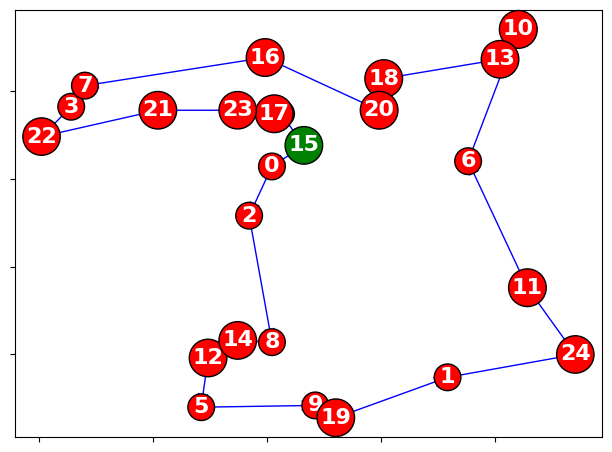

In [34]:
# get the best state from GA with the max fitness
best_it = ga_hp_mean.iloc[ga_hp_mean['Fitness'].idxmax()]
ordered_state = literal_eval(best_it['State'])

from util.utils import show_TSP_map

show_TSP_map(problem_medium, ordered_state)


# 5. Transfer on different problem sizes

In [58]:
# create sa, ga and mimic runners with the optimal hyperparameters

sa_easy = SARunner(problem=problem_easy,
                experiment_name='sa',
                output_directory=None, # note: specify an output directory to have results saved to disk
                seed=FIXED_SEED,
                iteration_list=np.arange(0, 1000, 10),
                max_attempts=1000,
                temperature_list=[sa_optimal_HP['schedule_init_temp']],
                decay_list=[mlrose_hiive.ArithDecay])

ga_easy = GARunner(problem=problem_easy,
                experiment_name='tsp_ga',
                output_directory=None, # note: specify an output directory to have results saved to disk
                seed=FIXED_SEED,
                iteration_list=np.arange(0, 1000, 10),
                max_attempts=1000,
                population_sizes=[ga_optimal_HP['Population Size']],
                mutation_rates=[ga_optimal_HP['Mutation Rate']]
                )

mmc_easy = MIMICRunner(problem=problem_easy,
                    experiment_name='tsp_mimic',
                    output_directory=None, # note: specify an output directory to have results saved to disk
                    seed=FIXED_SEED,
                    iteration_list=np.arange(0, 25, 1),
                    max_attempts=25,
                    population_sizes=[mmc_optimal_HP['Population Size']],
                    keep_percent_list=[mmc_optimal_HP['Keep Percent']],
                    use_fast_mimic=True
                    )

# run the experiments
sa_results_easy = run_experiment_multi_seed(sa_easy, RANDOM_SEEDS)
ga_results_easy = run_experiment_multi_seed(ga_easy, RANDOM_SEEDS)
mmc_results_easy = run_experiment_multi_seed(mmc_easy, RANDOM_SEEDS)

# get the mean, std, min and max from the results
sa_mean_easy, sa_std_easy, sa_min_easy, sa_max_easy = runner_results_to_stats(sa_results_easy)
ga_mean_easy, ga_std_easy, ga_min_easy, ga_max_easy = runner_results_to_stats(ga_results_easy)
mmc_mean_easy, mmc_std_easy, mmc_min_easy, mmc_max_easy = runner_results_to_stats(mmc_results_easy)

In [60]:
rhc_easy = RHCRunner(
                problem=problem_easy,
                experiment_name='rhc',
                output_directory=None,
                seed=FIXED_SEED,
                iteration_list= np.arange(0, 1000, 10),
                restart_list=[0],
                max_attempts=1000,
                )

rhc_results_easy = run_experiment_multi_seed(rhc_easy, RANDOM_SEEDS)

rhc_mean_easy, rhc_std_easy, rhc_min_easy, rhc_max_easy = runner_results_to_stats(rhc_results_easy)

In [61]:
# Make a df with the best fitness for each algorithm
best_fitness = pd.DataFrame({'RHC': [rhc_mean_easy['Fitness'].max()],
                             'SA': [sa_mean_easy['Fitness'].max()],
                             'GA': [ga_mean_easy['Fitness'].max()],
                             'MIMIC': [mmc_mean_easy['Fitness'].max()]})
best_fitness

,RHC,SA,GA,MIMIC
0,-679.878054,-668.916548,-664.96179,-671.273775


In [62]:
# Now on the hard problem

# create sa, ga and mimic runners with the optimal hyperparameters

sa_hard = SARunner(problem=problem_hard,
                experiment_name='sa',
                output_directory=None, # note: specify an output directory to have results saved to disk
                seed=FIXED_SEED,
                iteration_list=np.arange(0, 1000, 10),
                max_attempts=1000,
                temperature_list=[sa_optimal_HP['schedule_init_temp']],
                decay_list=[mlrose_hiive.ArithDecay])

ga_hard = GARunner(problem=problem_hard,
                experiment_name='tsp_ga',
                output_directory=None, # note: specify an output directory to have results saved to disk
                seed=FIXED_SEED,
                iteration_list=np.arange(0, 1000, 10),
                max_attempts=1000,
                population_sizes=[ga_optimal_HP['Population Size']],
                mutation_rates=[ga_optimal_HP['Mutation Rate']]
                )

mmc_hard = MIMICRunner(problem=problem_hard,
                    experiment_name='tsp_mimic',
                    output_directory=None, # note: specify an output directory to have results saved to disk
                    seed=FIXED_SEED,
                    iteration_list=np.arange(0, 25, 1),
                    max_attempts=25,
                    population_sizes=[mmc_optimal_HP['Population Size']],
                    keep_percent_list=[mmc_optimal_HP['Keep Percent']],
                    use_fast_mimic=True
                    )

# run the experiments
sa_results_hard = run_experiment_multi_seed(sa_hard, RANDOM_SEEDS)
ga_results_hard = run_experiment_multi_seed(ga_hard, RANDOM_SEEDS)
mmc_results_hard = run_experiment_multi_seed(mmc_hard, RANDOM_SEEDS)

# get the mean, std, min and max from the results
sa_mean_hard, sa_std_hard, sa_min_hard, sa_max_hard = runner_results_to_stats(sa_results_hard)
ga_mean_hard, ga_std_hard, ga_min_hard, ga_max_hard = runner_results_to_stats(ga_results_hard)
mmc_mean_hard, mmc_std_hard, mmc_min_hard, mmc_max_hard = runner_results_to_stats(mmc_results_hard)

In [63]:
# run the RHC
rhc_hard = RHCRunner(
                problem=problem_hard,
                experiment_name='rhc',
                output_directory=None,
                seed=FIXED_SEED,
                iteration_list= np.arange(0, 2500, 10),
                restart_list=[0],
                max_attempts=1000,
                )

rhc_results_hard = run_experiment_multi_seed(rhc_hard, RANDOM_SEEDS)

rhc_mean_hard, rhc_std_hard, rhc_min_hard, rhc_max_hard = runner_results_to_stats(rhc_results_hard)

In [65]:
# Make a df with the best fitness for each algorithm
best_fitness = pd.DataFrame({'RHC': [rhc_mean_hard['Fitness'].max()],
                             'SA': [sa_mean_hard['Fitness'].max()],
                             'GA': [ga_mean_hard['Fitness'].max()],
                             'MIMIC': [mmc_mean_hard['Fitness'].max()]})

best_fitness

,RHC,SA,GA,MIMIC
0,-2281.945632,-2703.239116,-2168.889358,-4274.296415


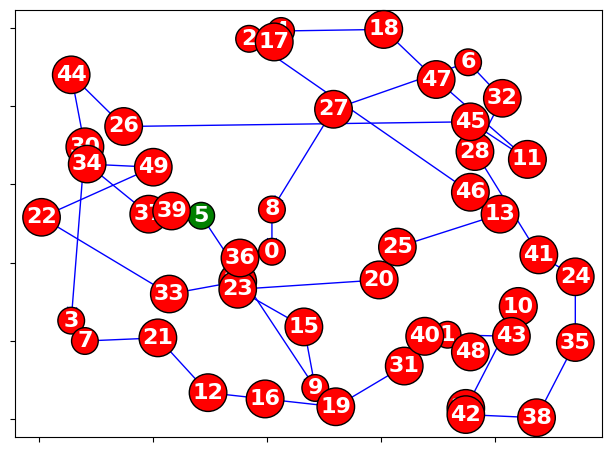

In [66]:
# get best state from the best run of GA
best_it = ga_mean_hard.iloc[ga_mean_hard['Fitness'].idxmax()]
ordered_state = literal_eval(best_it['State'])

show_TSP_map(problem_hard, ordered_state)